# Study of the thermal EDO for different scenarios

In this notebook we will analyze the used thermal ordinary differential equation (ODE) given by

$$ mc_P\frac{dT}{dt} = \beta Q(t) -UA(T - T_{env}) - \epsilon \sigma A (T^4 - T_{env}^4) $$

for different scenarios, varying the system parameters and the heat input function ($Q(t)$).

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
colores = ['#DCF0EC','#9AD6D0','#5E1F99','#B69DB7','#417EF0','#C8EFBE','#256146','#B3CDEA','#8A73F0','#EA9C2F']

## Test 1: Sudden increase of temperature (fire scenario)

In [3]:
# Example parameters
T0 = 273.15 + 23.01        # Initial temperature [K]
Tamb = 273.15 + 23      # Ambient temperature [K]
eps = 0.25         # Emissivity
sigma = 5.67e-8   # Stefan-Boltzmann constant [W/m^2*K^4]
Cp = 460.0       # Heat capacity [J/kg*K]
# Estos son los parámetros de juego
m = 0.5           # Mass [kg]
A = 0.2           # Surface area [m^2]
U = 25.0            # Heat transfer coefficient [W/m^2*K]
beta = 5        # Conversion factor [W / % heater input]

In [4]:
def heat_function(t, T, Q_func, Tamb, U, m, Cp, A, beta, eps, sigma):
    Q = Q_func(t) # Evaluate heat input at time t
    dTdt = (beta * Q / (m * Cp)
            - U * A * (T - Tamb) / (m * Cp)
            - eps * sigma * A * (T**4 - Tamb**4) / (m * Cp))
    return dTdt

In [5]:
def heat_ode(T0, Tamb, U, m, Cp, A, beta, eps, sigma):

    n = 60 * 20  # Simulation length = 20 minutes (in seconds)
    time = np.linspace(1, n, n)  # Time vector for evaluation

    # Define Q as a function of time (in this case, rectangular pulse starting at the origin)
    width = n / 5.0 # Pulse width
    start_point = 2 * n / 5.0
    end_point = start_point + width
    def Q_func(t):
        return 100 * (1.0 if start_point <= t <= end_point else 0.0)

    # Solve the ODE using RK45 (adaptive Runge-Kutta)
    solve_edo = solve_ivp(fun = lambda t, T: heat_function(t, T, Q_func, Tamb, U, m, Cp, A, beta, eps, sigma),
                          t_span = (time[0], time[-1]), # Integration interval,
                          y0 = [T0],    # Initial condition
                          t_eval = time,    # Return solution at these times
                          method="RK45", dense_output=True)

    # Reconstruct Q values at the sampled times
    Q_vals = np.array([Q_func(t) for t in solve_edo.t])

    return solve_edo.t, solve_edo.y[0], Q_vals

In [6]:
# Solve the ODE
time, T, Q = heat_ode(T0, Tamb, U, m, Cp, A, beta, eps, sigma)

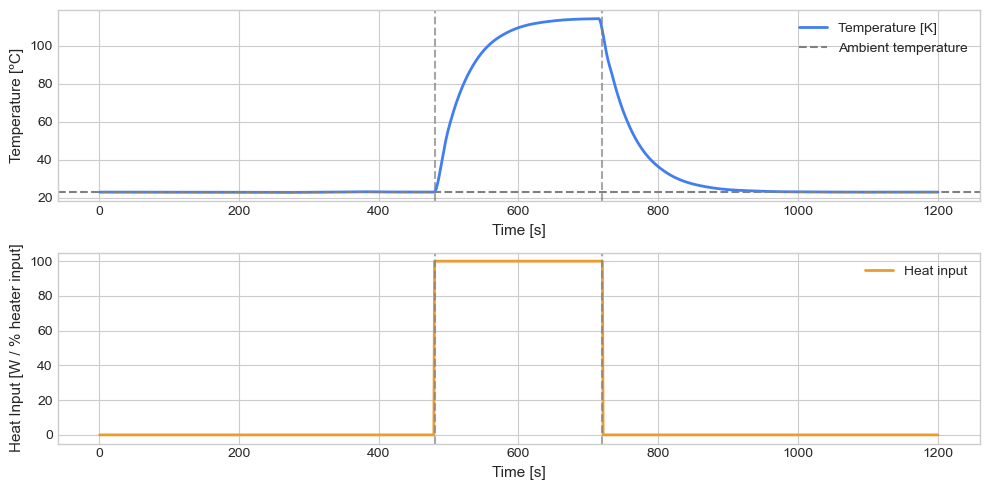

In [7]:
# Compute pulse start and end
n = 60 * 20
width =  n / 5.0
pulse_start = 2 * n / 5.0
pulse_end = pulse_start + width

# Plot temperature evolution
plt.figure(figsize=(10,5))

plt.style.use('seaborn-v0_8-whitegrid')

plt.subplot(2,1,1)
plt.plot(time, T - 273.15, color=colores[4], label="Temperature [K]", linewidth=2)
plt.axhline(Tamb - 273.15, color="gray", linestyle="--", label="Ambient temperature")
plt.axvline(pulse_start, color="gray", linestyle="--", alpha=0.7)
plt.axvline(pulse_end, color="gray", linestyle="--", alpha=0.7)
plt.xlabel("Time [s]", fontsize=11)
plt.ylabel("Temperature [ºC]", fontsize=11)
plt.legend()
plt.grid(True)

# Plot heat input (pulse)
plt.subplot(2,1,2)
plt.plot(time, Q, color=colores[9], label="Heat input", linewidth=2)
plt.axvline(pulse_start, color="gray", linestyle="--", alpha=0.7)
plt.axvline(pulse_end, color="gray", linestyle="--", alpha=0.7)
plt.xlabel("Time [s]", fontsize=11)
plt.ylabel("Heat Input [W / % heater input]", fontsize=11)
plt.legend()
plt.grid(True)

plt.tight_layout()
# plt.savefig("heat_ode_simulation.pdf", dpi=300)
plt.show()

## Test 2: A slower heating process in time

In [8]:
def heat_ode(T0, Tamb, U, m, Cp, A, beta, eps, sigma):

    n = 60 * 20  # Simulation length = 20 minutes (in seconds)
    time = np.linspace(1, n, n)  # Time vector for evaluation

    # Define Q as a function of time (in this case, rectangular pulse starting at the origin)
    width = n / 5.0 # Pulse width
    start_point = 2 * n / 5.0
    end_point = start_point + width
    def Q_func(t):
        a = 100/(end_point - start_point)
        b = -a * start_point
        return a*t+b if start_point <= t <= end_point else 0.0

    # Solve the ODE using RK45 (adaptive Runge-Kutta)
    solve_edo = solve_ivp(fun = lambda t, T: heat_function(t, T, Q_func, Tamb, U, m, Cp, A, beta, eps, sigma),
                          t_span = (time[0], time[-1]), # Integration interval,
                          y0 = [T0],    # Initial condition
                          t_eval = time,    # Return solution at these times
                          method="RK45", dense_output=True)

    # Reconstruct Q values at the sampled times
    Q_vals = np.array([Q_func(t) for t in solve_edo.t])

    return solve_edo.t, solve_edo.y[0], Q_vals

In [9]:
# Solve the ODE
time, T, Q = heat_ode(T0, Tamb, U, m, Cp, A, beta, eps, sigma)

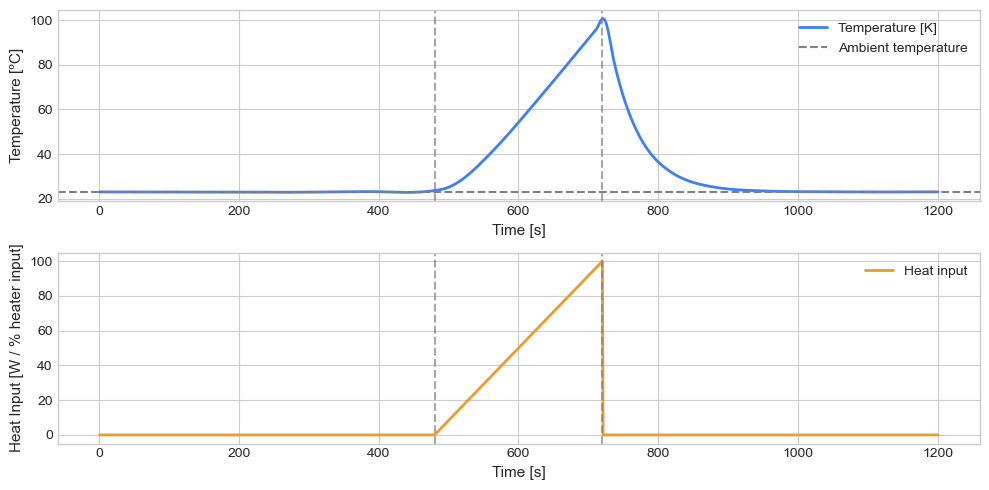

In [10]:
# Compute pulse start and end
n = 60 * 20
width = n / 5.0
pulse_start = 2 * n / 5.0
pulse_end = pulse_start + width

# Plot temperature evolution
plt.figure(figsize=(10,5))

plt.style.use('seaborn-v0_8-whitegrid')

plt.subplot(2,1,1)
plt.plot(time, T - 273.15, color=colores[4], label="Temperature [K]", linewidth=2)
plt.axhline(Tamb - 273.15, color="gray", linestyle="--", label="Ambient temperature")
plt.axvline(pulse_start, color="gray", linestyle="--", alpha=0.7)
plt.axvline(pulse_end, color="gray", linestyle="--", alpha=0.7)
plt.xlabel("Time [s]", fontsize=11)
plt.ylabel("Temperature [ºC]", fontsize=11)
plt.legend()
plt.grid(True)

# Plot heat input (pulse)
plt.subplot(2,1,2)
plt.plot(time, Q, color=colores[9], label="Heat input", linewidth=2)
plt.axvline(pulse_start, color="gray", linestyle="--", alpha=0.7)
plt.axvline(pulse_end, color="gray", linestyle="--", alpha=0.7)
plt.xlabel("Time [s]", fontsize=11)
plt.ylabel("Heat Input [W / % heater input]", fontsize=11)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("heat_ode_simulation_2.pdf", dpi=300)
plt.show()

## Test 3: Combining 1 and 2

In [11]:
def heat_ode(T0, Tamb, U, m, Cp, A, beta, eps, sigma):

    n = 60 * 60  # Simulation length = 20 minutes (in seconds)
    time = np.linspace(1, n, n)  # Time vector for evaluation

    # Define Q as a function of time (in this case, rectangular pulse starting at the origin)
    width = 3 * n / 5.0 # Pulse width
    start_point = 0 * n / 5.0
    stop_point = start_point + 4 * width / 5
    end_point = start_point + width
    def Q_func(t):
        a = 100/(stop_point - start_point)
        b = -a * start_point
        if start_point <= t <= stop_point:
            return a*t + b
        elif stop_point < t <= end_point:
            return 200.0
        else:
            return 0.0

    # Solve the ODE using RK45 (adaptive Runge-Kutta)
    solve_edo = solve_ivp(fun = lambda t, T: heat_function(t, T, Q_func, Tamb, U, m, Cp, A, beta, eps, sigma),
                          t_span = (time[0], time[-1]), # Integration interval,
                          y0 = [T0],    # Initial condition
                          t_eval = time,    # Return solution at these times
                          method="RK45", dense_output=True)

    # Reconstruct Q values at the sampled times
    Q_vals = np.array([Q_func(t) for t in solve_edo.t])

    return solve_edo.t, solve_edo.y[0], Q_vals

In [12]:
# Solve the ODE
time, T, Q = heat_ode(T0, Tamb, U, m, Cp, A, beta, eps, sigma)

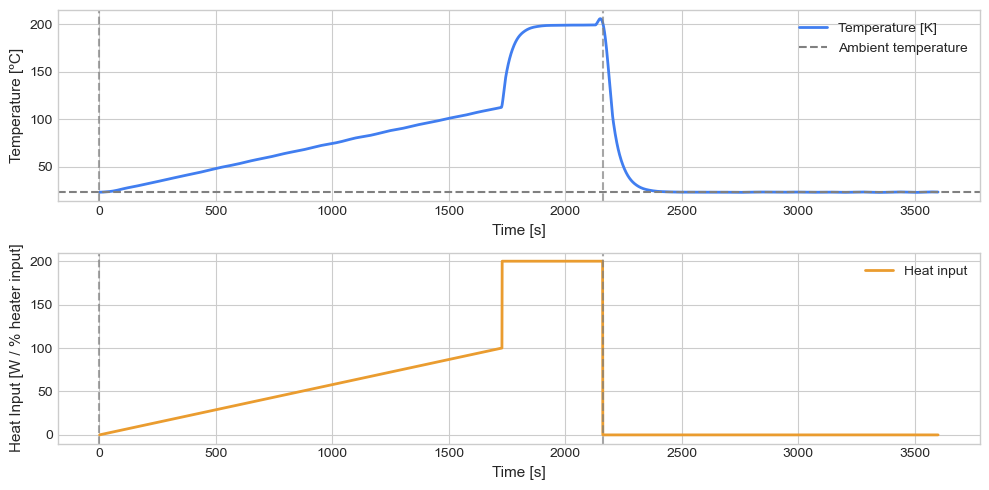

In [13]:
# Compute pulse start and end
n = 60 * 60
width = 3 * n / 5.0
pulse_start = 0 * n / 5.0
pulse_end = pulse_start + width

# Plot temperature evolution
plt.figure(figsize=(10,5))

plt.style.use('seaborn-v0_8-whitegrid')

plt.subplot(2,1,1)
plt.plot(time, T - 273.15, color=colores[4], label="Temperature [K]", linewidth=2)
plt.axhline(Tamb - 273.15, color="gray", linestyle="--", label="Ambient temperature")
plt.axvline(pulse_start, color="gray", linestyle="--", alpha=0.7)
plt.axvline(pulse_end, color="gray", linestyle="--", alpha=0.7)
plt.xlabel("Time [s]", fontsize=11)
plt.ylabel("Temperature [ºC]", fontsize=11)
plt.legend()
plt.grid(True)

# Plot heat input (pulse)
plt.subplot(2,1,2)
plt.plot(time, Q, color=colores[9], label="Heat input", linewidth=2)
plt.axvline(pulse_start, color="gray", linestyle="--", alpha=0.7)
plt.axvline(pulse_end, color="gray", linestyle="--", alpha=0.7)
plt.xlabel("Time [s]", fontsize=11)
plt.ylabel("Heat Input [W / % heater input]", fontsize=11)
plt.legend()
plt.grid(True)

plt.tight_layout()
# plt.savefig("heat_ode_simulation_3.pdf", dpi=300)
plt.show()

## Test 4: Exponential Heating

In [44]:
def heat_ode(T0, Tamb, U, m, Cp, A, beta, eps, sigma):

    n = 60 * 60  # Simulation length = 20 minutes (in seconds)
    time = np.linspace(1, n, n)  # Time vector for evaluation

    # Define Q as a function of time (in this case, rectangular pulse starting at the origin)
    width = 3 * n / 5.0 # Pulse width
    start_point = 0 * n / 5.0
    end_point = start_point + width
    def Q_func(t):
        return np.exp(0.002*(t - start_point)) if start_point <= t <= end_point else 0.0

    # Solve the ODE using RK45 (adaptive Runge-Kutta)
    solve_edo = solve_ivp(fun = lambda t, T: heat_function(t, T, Q_func, Tamb, U, m, Cp, A, beta, eps, sigma),
                          t_span = (time[0], time[-1]), # Integration interval,
                          y0 = [T0],    # Initial condition
                          t_eval = time,    # Return solution at these times
                          method="RK45", dense_output=True)

    # Reconstruct Q values at the sampled times
    Q_vals = np.array([Q_func(t) for t in solve_edo.t])

    return solve_edo.t, solve_edo.y[0], Q_vals

In [45]:
# Solve the ODE
time, T, Q = heat_ode(T0, Tamb, U, m, Cp, A, beta, eps, sigma)

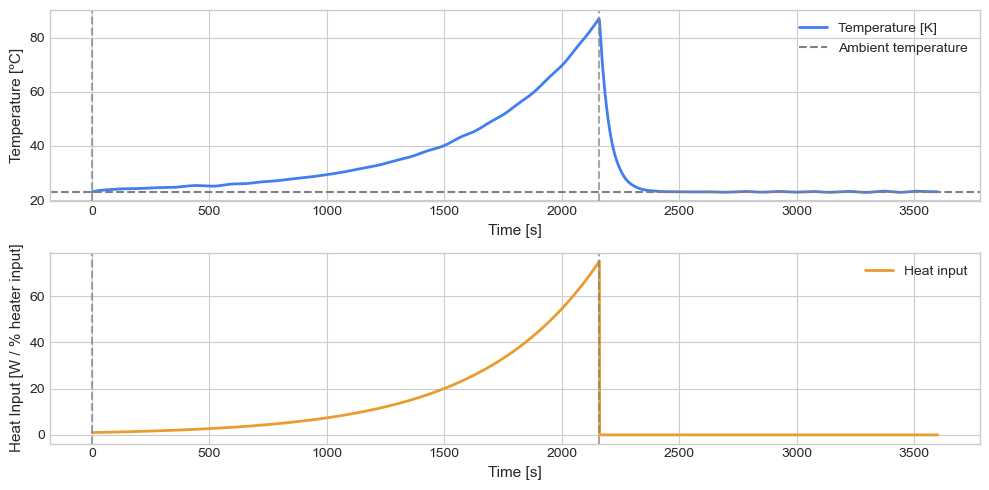

In [46]:
# Compute pulse start and end
n = 60 * 60
width = 3 * n / 5.0
pulse_start = 0 * n / 5.0
pulse_end = pulse_start + width

# Plot temperature evolution
plt.figure(figsize=(10, 5))

plt.style.use('seaborn-v0_8-whitegrid')

plt.subplot(2,1,1)
plt.plot(time, T - 273.15, color=colores[4], label="Temperature [K]", linewidth=2)
plt.axhline(Tamb - 273.15, color="gray", linestyle="--", label="Ambient temperature")
plt.axvline(pulse_start, color="gray", linestyle="--", alpha=0.7)
plt.axvline(pulse_end, color="gray", linestyle="--", alpha=0.7)
plt.xlabel("Time [s]", fontsize=11)
plt.ylabel("Temperature [ºC]", fontsize=11)
plt.legend()
plt.grid(True)

# Plot heat input (pulse)
plt.subplot(2,1,2)
plt.plot(time, Q, color=colores[9], label="Heat input", linewidth=2)
plt.axvline(pulse_start, color="gray", linestyle="--", alpha=0.7)
plt.axvline(pulse_end, color="gray", linestyle="--", alpha=0.7)
plt.xlabel("Time [s]", fontsize=11)
plt.ylabel("Heat Input [W / % heater input]", fontsize=11)
plt.legend()
plt.grid(True)

plt.tight_layout()
# plt.savefig("heat_ode_simulation_4.pdf", dpi=300)
plt.show()

## Test 5: System Cooling Failure

In [30]:
def heat_function(t, T, Q, Tamb, U_func, m, Cp, A, beta, eps, sigma):
    U = U_func(t) # Evaluate heat transfer coefficient at time t
    dTdt = (beta * Q / (m * Cp)
            - U * A * (T - Tamb) / (m * Cp)
            - eps * sigma * A * (T**4 - Tamb**4) / (m * Cp))
    return dTdt

In [37]:
def heat_ode(T0, Tamb, U, m, Cp, A, beta, eps, sigma):

    n = 60 * 20  # Simulation length = 60 minutes (in seconds)
    time = np.linspace(1, n, n)  # Time vector for evaluation

    # Define U as a function of time with a pulse to simulate cooling system failure
    width = n / 5.0 # Pulse width
    pulse_start = 2 * n / 5.0
    pulse_end = pulse_start + width
    def U_func(t):
        return U * 0.1 if pulse_start <= t <= pulse_end else U


    # Solve the ODE using RK45 (adaptive Runge-Kutta)
    solve_edo = solve_ivp(fun = lambda t, T: heat_function(t, T, 20, Tamb, U_func, m, Cp, A, beta, eps, sigma),
                          t_span = (time[0], time[-1]), # Integration interval,
                          y0 = [T0],    # Initial condition
                          t_eval = time,    # Return solution at these times
                          method="RK45", dense_output=True)

    # Reconstruct Q values at the sampled times
    U_vals = np.array([U_func(t) for t in solve_edo.t])

    return solve_edo.t, solve_edo.y[0], U_vals

In [38]:
time, T, U_values = heat_ode(T0, Tamb, U, m, Cp, A, beta, eps, sigma)

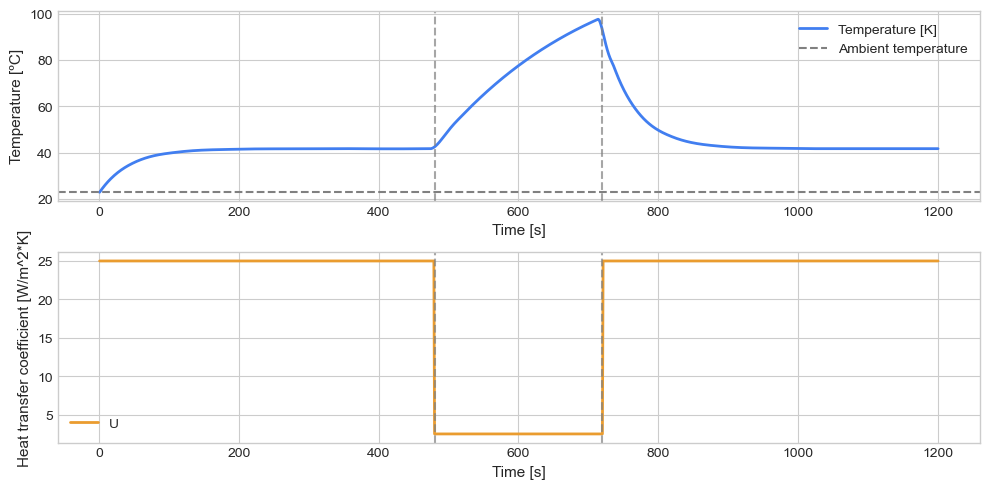

In [40]:
# Compute pulse start and end
n = 60 * 20
width = n / 5.0
pulse_start = 2 * n / 5.0
pulse_end = pulse_start + width

# Plot temperature evolution
plt.figure(figsize=(10,5))

plt.style.use('seaborn-v0_8-whitegrid')

plt.subplot(2,1,1)
plt.plot(time, T - 273.15, color=colores[4], label="Temperature [K]", linewidth=2)
plt.axhline(Tamb - 273.15, color="gray", linestyle="--", label="Ambient temperature")
plt.axvline(pulse_start, color="gray", linestyle="--", alpha=0.7)
plt.axvline(pulse_end, color="gray", linestyle="--", alpha=0.7)
plt.xlabel("Time [s]", fontsize=11)
plt.ylabel("Temperature [ºC]", fontsize=11)
plt.legend()
plt.grid(True)

# Plot heat input (pulse)
plt.subplot(2,1,2)
plt.plot(time, U_values, color=colores[9], label="U", linewidth=2)
plt.axvline(pulse_start, color="gray", linestyle="--", alpha=0.7)
plt.axvline(pulse_end, color="gray", linestyle="--", alpha=0.7)
plt.xlabel("Time [s]", fontsize=11)
plt.ylabel("Heat transfer coefficient [W/m^2*K]", fontsize=11)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("heat_ode_simulation_5.pdf", dpi=300)
plt.show()